In [1]:
import re
import pickle
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer
import string
from nltk import wordnet
from textblob import TextBlob
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()

In [2]:
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv("D:\\6th semester\\Artifical Intelligence Lab\\Emotion Prediction\\covid19_tweets.csv",encoding=DATASET_ENCODING )
dataset.head()
dataset = dataset[['user_name','text']]
dataset.head()

,user_name,text
0,áá¥â»Õ¬ê Ï®,If I smelled the scent of hand sanitizers toda...
1,Tom Basile ðºð¸,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,25 July : Media Bulletin on Novel #CoronaVirus...


In [3]:
# nltk.download("stopwords")

def preprocess(textdata):
    processedText = []
    # Create Lemmatizer and Stemmer
    wordLemm = WordNetLemmatizer()
    # Regex patterns
    emoji=r'\\u[1F600-1F6FF]'
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    for tweet in textdata:
        tweet = tweet.lower()
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' ',tweet)
        # Replace all emojis.
        tweet = re.sub(emoji, ' ' ,tweet)        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' ', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            # If word not in stopwordlist
            if len(word)>1:
                
                word = wordLemm.lemmatize(word)
            
                tweetwords += (word+' ')
        processedText.append(tweetwords)
        
    return processedText
  

In [4]:
import time
# nltk.download('all')
t = time.time()
processedtext = preprocess(dataset['text'])
dataset['clean data']=processedtext
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')



Text Preprocessing complete.
Time Taken: 16 seconds


In [5]:
dataset.head()


,user_name,text,clean data
0,áá¥â»Õ¬ê Ï®,If I smelled the scent of hand sanitizers toda...,if smelled the scent of hand sanitizers today ...
1,Tom Basile ðºð¸,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldn it have made more sense to have...
2,Time4fisticuffs,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid19 wa hoax we al...
3,ethel mertz,@brookbanktv The one gift #COVID19 has give me...,the one gift covid19 ha give me is an apprecia...
4,DIPR-J&K,25 July : Media Bulletin on Novel #CoronaVirus...,25 july medium bulletin on novel coronavirusup...


In [6]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
dataset['Subjectivity']=dataset['clean data'].apply(getSubjectivity)
dataset['Polarity']=dataset['clean data'].apply(getPolarity)
dataset.head(20)

,user_name,text,clean data,Subjectivity,Polarity
0,áá¥â»Õ¬ê Ï®,If I smelled the scent of hand sanitizers toda...,if smelled the scent of hand sanitizers today ...,0.250000,-0.250000
1,Tom Basile ðºð¸,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldn it have made more sense to have...,0.500000,0.500000
2,Time4fisticuffs,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid19 wa hoax we al...,0.000000,0.000000
3,ethel mertz,@brookbanktv The one gift #COVID19 has give me...,the one gift covid19 ha give me is an apprecia...,0.357143,0.000000
4,DIPR-J&K,25 July : Media Bulletin on Novel #CoronaVirus...,25 july medium bulletin on novel coronavirusup...,0.000000,0.000000
5,ð¹ Franz Schubert,#coronavirus #covid19 deaths continue to rise....,coronavirus covid19 death continue to rise it ...,0.666667,-0.700000
6,hr bartender,How #COVID19 Will Change Work in General (and ...,how covid19 will change work in general and re...,0.500000,0.050000
7,Derbyshire LPC,You now have to wear face coverings when out s...,you now have to wear face covering when out sh...,0.000000,0.000000
8,Prathamesh Bendre,Praying for good health and recovery of @Chouh...,praying for good health and recovery of covid1...,0.600000,0.700000
9,Member of Christ ð¨ð³ðºð¸ð®ð³ð®ð...,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,pope a god prophet sadhu sundar selvaraj watch...,0.000000,0.000000


In [7]:
#plot the polarity and subjectiviy
# dataset.head()
# plt.figure(figsize=(8,6))
# for i in range(0,dataset.shape[0]):
#     plt.scatter(dataset['Polarity'][i],dataset['Subjectivity'][i],color='Blue')
# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [8]:
def GetAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
dataset['Sen_Analysis']=dataset['Polarity'].apply(GetAnalysis)
dataset.head(5)

,user_name,text,clean data,Subjectivity,Polarity,Sen_Analysis
0,áá¥â»Õ¬ê Ï®,If I smelled the scent of hand sanitizers toda...,if smelled the scent of hand sanitizers today ...,0.250000,-0.25,Negative
1,Tom Basile ðºð¸,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldn it have made more sense to have...,0.500000,0.50,Positive
2,Time4fisticuffs,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid19 wa hoax we al...,0.000000,0.00,Neutral
3,ethel mertz,@brookbanktv The one gift #COVID19 has give me...,the one gift covid19 ha give me is an apprecia...,0.357143,0.00,Neutral
4,DIPR-J&K,25 July : Media Bulletin on Novel #CoronaVirus...,25 july medium bulletin on novel coronavirusup...,0.000000,0.00,Neutral


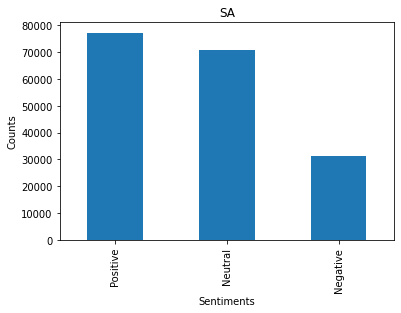

In [9]:
dataset['Sen_Analysis'].value_counts()
plt.title('SA')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
dataset['Sen_Analysis'].value_counts().plot(kind='bar')
plt.show()

([<matplotlib.patches.Wedge at 0x233c967e2e0>,
 [Text(0.23585925373001024, 1.0744163124366284, 'Negative'),
  Text(-0.7598110410084808, -0.7954163576150599, 'Positive'),
  Text(0.9398334049771402, -0.5715882879215379, 'Neutral')])

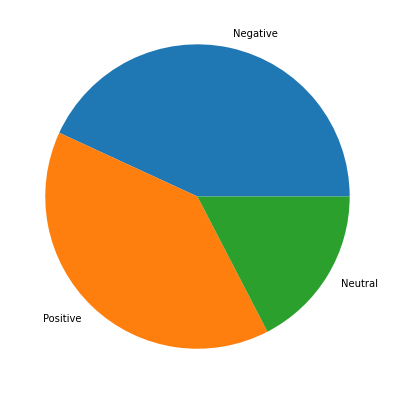

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(dataset['Sen_Analysis'].value_counts(), labels = dataset['Sen_Analysis'].unique())

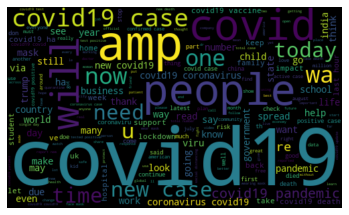

In [11]:
#plot the world cloud
All_word=' '.join([twts for twts in dataset['clean data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(All_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
pos_tweets=dataset[dataset['Sen_Analysis']=='Positive']
pos_tweets.head()


,user_name,text,clean data,Subjectivity,Polarity,Sen_Analysis
1,Tom Basile ðºð¸,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldn it have made more sense to have...,0.50,0.50,Positive
6,hr bartender,How #COVID19 Will Change Work in General (and ...,how covid19 will change work in general and re...,0.50,0.05,Positive
8,Prathamesh Bendre,Praying for good health and recovery of @Chouh...,praying for good health and recovery of covid1...,0.60,0.70,Positive
12,SEXXYLYPPS,ðð»@PattyHajdu @NavdeepSBains â no one ...,no one will be safe from covid19 until everyon...,0.50,0.50,Positive
13,Africa Youth Advisory Board on DRR,Let's all protect ourselves from #COVID19.\nIt...,let all protect ourselves from covid19 it real...,0.45,0.20,Positive


In [13]:
neg_tweets=dataset[dataset['Sen_Analysis']=='Negative']
neg_tweets.head()

,user_name,text,clean data,Subjectivity,Polarity,Sen_Analysis
0,áá¥â»Õ¬ê Ï®,If I smelled the scent of hand sanitizers toda...,if smelled the scent of hand sanitizers today ...,0.250000,-0.250000,Negative
5,ð¹ Franz Schubert,#coronavirus #covid19 deaths continue to rise....,coronavirus covid19 death continue to rise it ...,0.666667,-0.700000,Negative
22,Micah Pollak,"@JimBnntt Your image doesn't list a source, bu...",your image doesn list source but be careful wi...,0.466667,-0.033333,Negative
32,Beautify Data,"An update on the total #covid19 cases, recover...",an update on the total covid19 case recovery a...,0.833333,-0.200000,Negative
36,harleyb,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,feeling little anxious because covid19 seems t...,0.750000,-0.218750,Negative


In [14]:
neu_tweets=dataset[dataset['Sen_Analysis']=='Neutral']
neu_tweets.head()

,user_name,text,clean data,Subjectivity,Polarity,Sen_Analysis
2,Time4fisticuffs,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid19 wa hoax we al...,0.000000,0.0,Neutral
3,ethel mertz,@brookbanktv The one gift #COVID19 has give me...,the one gift covid19 ha give me is an apprecia...,0.357143,0.0,Neutral
4,DIPR-J&K,25 July : Media Bulletin on Novel #CoronaVirus...,25 july medium bulletin on novel coronavirusup...,0.000000,0.0,Neutral
7,Derbyshire LPC,You now have to wear face coverings when out s...,you now have to wear face covering when out sh...,0.000000,0.0,Neutral
9,Member of Christ ð¨ð³ðºð¸ð®ð³ð®ð...,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,pope a god prophet sadhu sundar selvaraj watch...,0.000000,0.0,Neutral


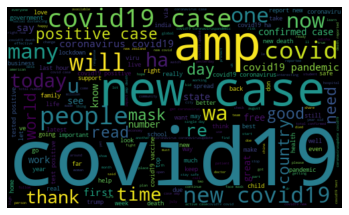

In [15]:
Pos_word=' '.join([twts for twts in pos_tweets['clean data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(Pos_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

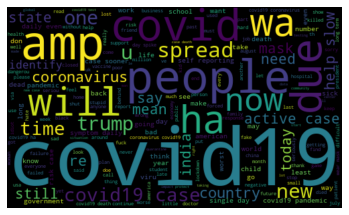

In [16]:
Neg_word=' '.join([twts for twts in neg_tweets['clean data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(Neg_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

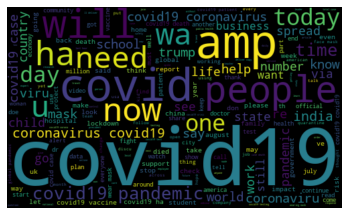

In [17]:
Neu_word=' '.join([twts for twts in neu_tweets['clean data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(Neu_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import confusion_matrix, classification_report 

In [20]:
import seaborn as sns

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
dataset['Sen_Analysis'].unique()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset[ 'Sen_Analysis'] = le.fit_transform(dataset[ 'Sen_Analysis'])
dataset.head()

x=dataset['clean data']
y=dataset['Sen_Analysis']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.5, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectorizer.fit(X_train)
print(f'Vectorizer fitted')
print('No. of feature_words: ',len(vectorizer.get_feature_names()))

Vectorizer fitted
No. of feature_words:  50000


C:\Users\Namra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(f'Data Transformed')

Data Transformed


In [25]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    
    # classification report
    print(classification_report(y_test, y_pred))
    
    # confusion report
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    categories = ['Negative', 'Positive','Neutral']
    
    group_names = ['True Neg', 'False Pos','False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.73      0.58      0.64     15393
           1       0.82      0.91      0.87     35482
           2       0.86      0.85      0.85     38679

    accuracy                           0.83     89554
   macro avg       0.80      0.78      0.79     89554
weighted avg       0.82      0.83      0.82     89554



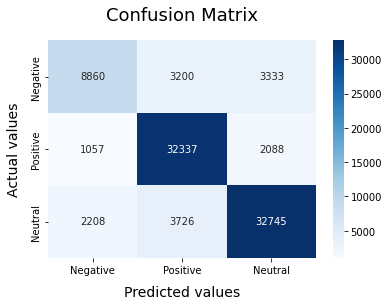

In [26]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     15393
           1       0.95      0.99      0.97     35482
           2       0.96      0.95      0.96     38679

    accuracy                           0.95     89554
   macro avg       0.95      0.93      0.94     89554
weighted avg       0.95      0.95      0.95     89554



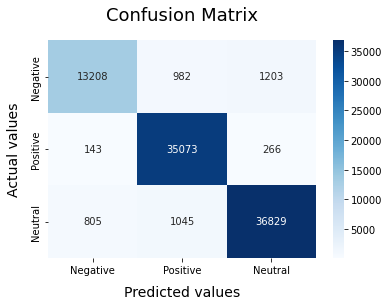

In [27]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     15393
           1       0.90      0.99      0.94     35482
           2       0.95      0.93      0.94     38679

    accuracy                           0.93     89554
   macro avg       0.93      0.90      0.91     89554
weighted avg       0.93      0.93      0.92     89554



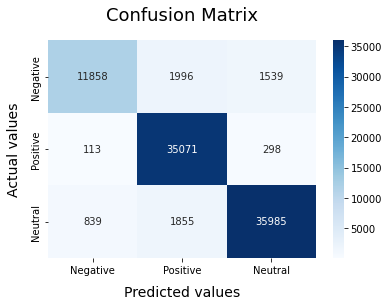

In [28]:
LRmodel = LogisticRegression(C =2, max_iter=1000, n_jobs=1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

In [29]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  


RandomForestClassifier(criterion='entropy', n_estimators=10)

              precision    recall  f1-score   support

           0       0.87      0.67      0.75     15393
           1       0.83      0.98      0.90     35482
           2       0.92      0.86      0.89     38679

    accuracy                           0.87     89554
   macro avg       0.87      0.83      0.85     89554
weighted avg       0.88      0.87      0.87     89554



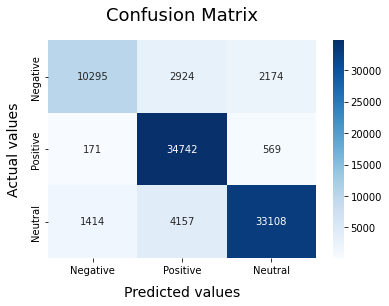

In [30]:
model_evaluate(classifier)

In [31]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectorizer, file)
file.close()


file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

file = open('Sentiment-RF.pickle','wb')
pickle.dump(classifier, file)
file.close()

file = open('Sentiment-SVC.pickle','wb')
pickle.dump(classifier, file)
file.close()

In [32]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    file = open('D:/6th semester/Artifical Intelligence Lab/Emotion Prediction/vectoriser-ngram-(1,2).pickle', 'rb')
    vectorizer = pickle.load(file)
    file.close()
    # # Load the LR Model.
    # file = open('D:/6th semester/Artifical Intelligence Lab/Emotion Prediction/Sentiment-LR.pickle', 'rb')
    # LRmodel = pickle.load(file)
    # file.close()

    # Load the RF Model.
    file = open('D:/6th semester/Artifical Intelligence Lab/Emotion Prediction/Sentiment-RF.pickle', 'rb')
    RFmodel = pickle.load(file)
    file.close()

     # Load the BNB Model.
    file = open('D:/6th semester/Artifical Intelligence Lab/Emotion Prediction/Sentiment-BNB.pickle', 'rb')
    BNB = pickle.load(file)
    file.close()

     # Load the SVC Model.
    file = open('D:/6th semester/Artifical Intelligence Lab/Emotion Prediction/Sentiment-SVC.pickle', 'rb')
    SVCmodel = pickle.load(file)
    file.close()
    
    return vectorizer, RFmodel,SVCmodel

def predict(vectorizer, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text,sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['Text','Sentiment'])
    df = df.replace([0,1,2], ["Negative","Positive","Neutral"])
    return df



In [33]:
# if __name__=="__main__":
#     # Loading the models.
#     #vectoriser, LRmodel = load_models()
#     text=[]
#     # Text to classify should be in a list.
#     data=input("Enter your text: ")
#     text.append(data)
    
#     df = predict(vectorizer, LRmodel, text)
#     print(df.head())

In [34]:
import tkinter as tk
from tkinter import *
from tkinter import simpledialog
from tkinter import messagebox
import tkinter


In [35]:
# ROOT = tk.Tk()
# text=[]
# ROOT.withdraw()
# ROOT.geometry("700x500")
# USER_INP = simpledialog.askstring(title="Emotion Prediction",prompt="Enter Your Text:") 
# text.append(USER_INP) 
# vectorizer, RFmodel,SVCmodel = load_models()
# df = predict(vectorizer, RFmodel, text)
# # check it out
# data=df['Sentiment']
# tkinter.messagebox.showinfo('Prediction',data.item())
